# CO543 - Image Processing Lab 02
## E/17/297


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import matplotlib.image as mpimg


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(250, 500)


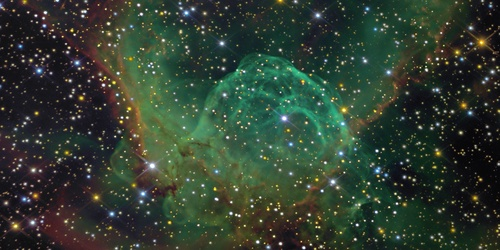

In [ ]:
folder = '/content/drive/MyDrive/CO543/Lab 2/'
img = cv2.imread(folder + 'images/img22.jpg') 
print(img.shape[:2])
cv2_imshow(img)

In [ ]:

def plotImg(img):
    imgplot = plt.imshow(img)
    plt.show()

#plotImg(img)

## 1. Image thresholding

### Lab Task 01 : Write a function to perform image thresholding using point processing taking the image file and the threshold value from the user.


In [ ]:
#compare the pixel value with the threshold value
#if pixel value is less than threshold then replace it with 0
#else replace with 255

def thresholding(img,val):
    #get the image dimensions
    height , width = img.shape[:2]
    
    for row in  range(height):
        for column in range(width):
            #compare with the threshold value
            if(img[row][column] < val):
                img[row][column] = 0
            else:
                img[row][column] = 255
                
    return img


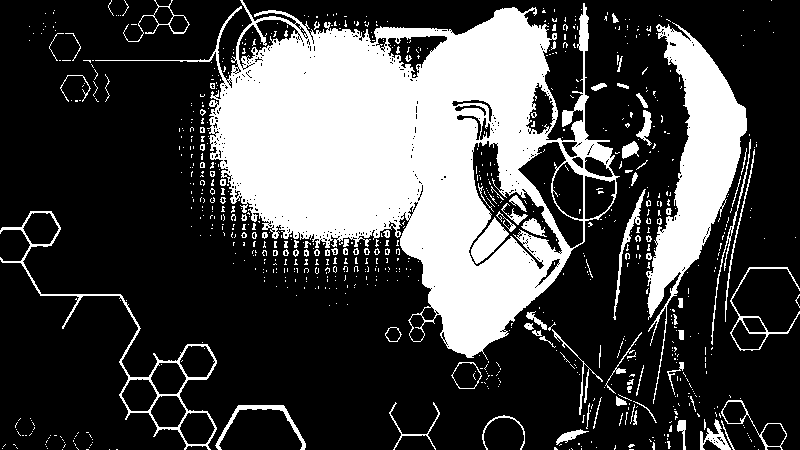

In [ ]:
img = cv2.imread(folder +'test_image.jpg' ,0)

cv2_imshow(thresholding(img,120))


## 2. Image arithmetic operations

Original Images


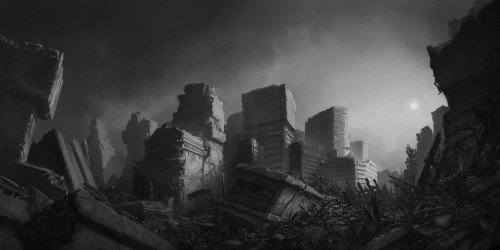

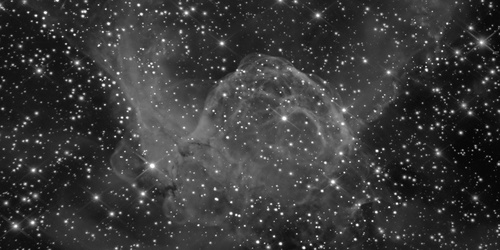


Addition


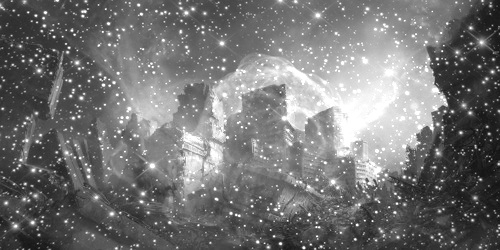

Substraction


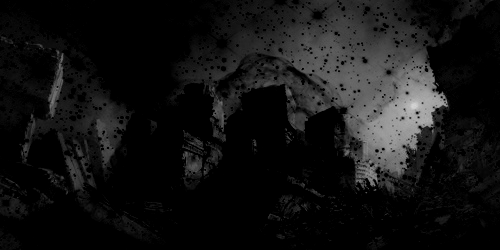

In [ ]:
img1 = cv2.imread(folder+ 'images/img11.jpg',0)
img2 = cv2.imread(folder+ 'images/img22.jpg',0)

print("Original Images")
cv2_imshow(img1)
cv2_imshow(img2)
print()
#addition and substraction
print("Addition")
cv2_imshow(cv2.add(img1,img2))
print("Substraction")
cv2_imshow(cv2.subtract(img1,img2))

## 3. Spatial Processing

### 1.Write simple programs to demonstrate the following. Show the original and resultant images in the same figure to compare them easily.

#### a. Log transformation
#### s = clog(1+r) 
#### s = output intensity , c = scaling constant
#### log transformation maps a narrow range of low-intensity input values to a wide range of output values


In [ ]:
#Log transformation
def logTransformation(img):
    #log transformation
    c = 255 / np.log(1 + np.max(img)) #calculating C
    log_img = c * np.log(1+img)
    
    #type casting to int
    log_img = np.array(log_img, dtype = np.uint8)
    
    return log_img
    

Text(0.5, 1.0, 'Log transformation')

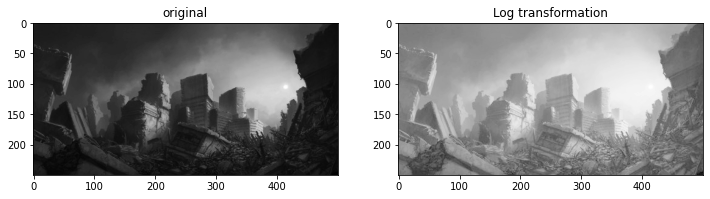

In [ ]:
img = cv2.imread(folder + '/images/img11.jpg',0)
logImg = logTransformation(img)

#show images
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axis[0].imshow(img, cmap ="gray")
axis[0].set_title("original")

axis[1].imshow(logImg, cmap ="gray")
axis[1].set_title("Log transformation")


### b. Power transformation

#### s = cr^γ
#### gamma >1 (curve corresponding to ‘nth power’ label on the graph) -The intensity of pixels decreases.


####   gamma<1 (curve corresponding to 'nth root' label on the graph)  - the intensity increases 

(-0.5, 489.5, 599.5, -0.5)

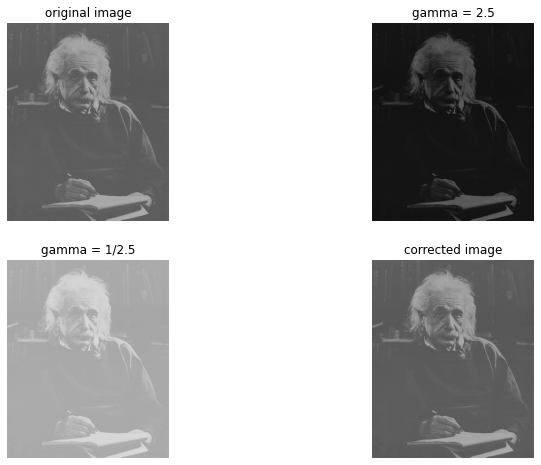

In [ ]:

img = cv2.imread(folder + 'Fig0354(a)(einstein_orig).tif')
#cv2_imshow(img)

gamma = 2.5
gamma_c = 1/gamma

#creating lookup tables
lookupTable = np.empty((1,256),np.uint8)
lookupTable1 = np.empty((1,256),np.uint8)

#filling lookup table
for i in range(256):
  lookupTable[0,i] = np.clip(pow(i/255.0, gamma) * 255.0,0,255)
  lookupTable1[0,i] = np.clip(pow(i/255.0, gamma_c) * 255.0,0,255)

#Simulate CRT monitor 
res = cv2.LUT(img, lookupTable)
#cv2_imshow(res)

#corrected image
corr = cv2.LUT(img,lookupTable1)

#feed to crt
fin = cv2.LUT(corr,lookupTable)

#show images
fig, axis = plt.subplots(2,2,figsize=(12, 8))

axis[0,0].imshow(img, cmap="gray")
axis[0,0].set_title("original image")
axis[0,0].axis('off')

axis[0,1].imshow(res, cmap="gray")
axis[0,1].set_title("gamma = 2.5")
axis[0,1].axis('off')

axis[1,0].imshow(corr, cmap="gray")
axis[1,0].set_title("gamma = 1/2.5")
axis[1,0].axis('off')

axis[1,1].imshow(fin, cmap="gray")
axis[1,1].set_title("corrected image")
axis[1,1].axis('off')


### c. Contrast Stretching


#### Contrast =  (I_max - I_min)/(I_max + I_min)


In [ ]:
#contrast strecthing function
def constrastStretch(pixel, r1, s1, r2, s2):
  if( pixel >= 0 and pixel <= r1):
    return (s1 / r1) * pixel
  elif(r1 < pixel and pixel <= r2):
    return ((s2-s1)/(r2-r1)) * (pixel - r1) + s1
  else:
    return ((255 - s2)/(255 - r2)) * (pixel - r2) + s2

original


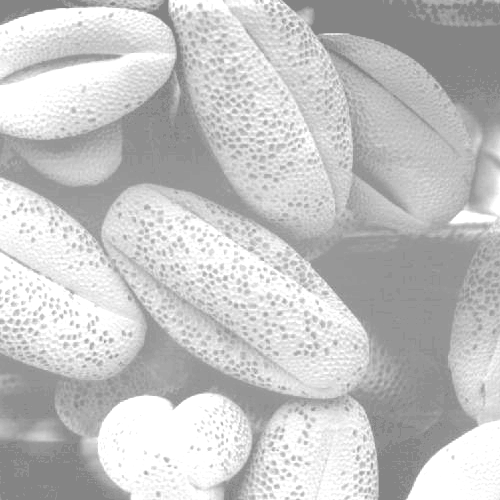

constrast Stretched


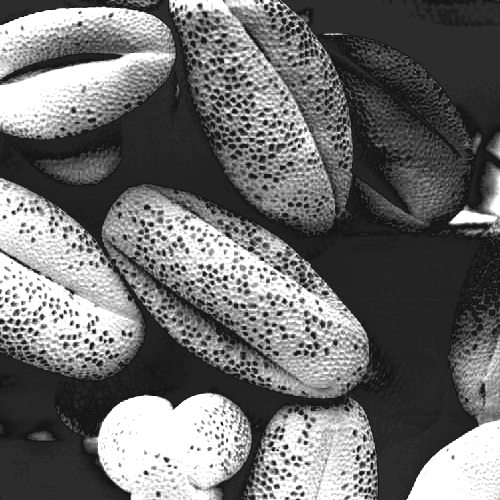

In [ ]:
#parameters
r1 = 120
s1 = 50
r2 = 180
s2 = 20

pixelVal_vec = np.vectorize(constrastStretch)
img = cv2.imread(folder + 'bright.tif')
constrastStretched = pixelVal_vec(img, r1, s1, r2, s2)

print("original")
cv2_imshow(img)
print("constrast Stretched")
cv2_imshow(constrastStretched)


### d. Gray level slicing

In [ ]:
# x1-x2 is the range
def grayLevelSlicing(pixel,x1,x2,max,min):
  if(x1 <= pixel and pixel <=x2):
    return max
  else:
    return min
  

Original image


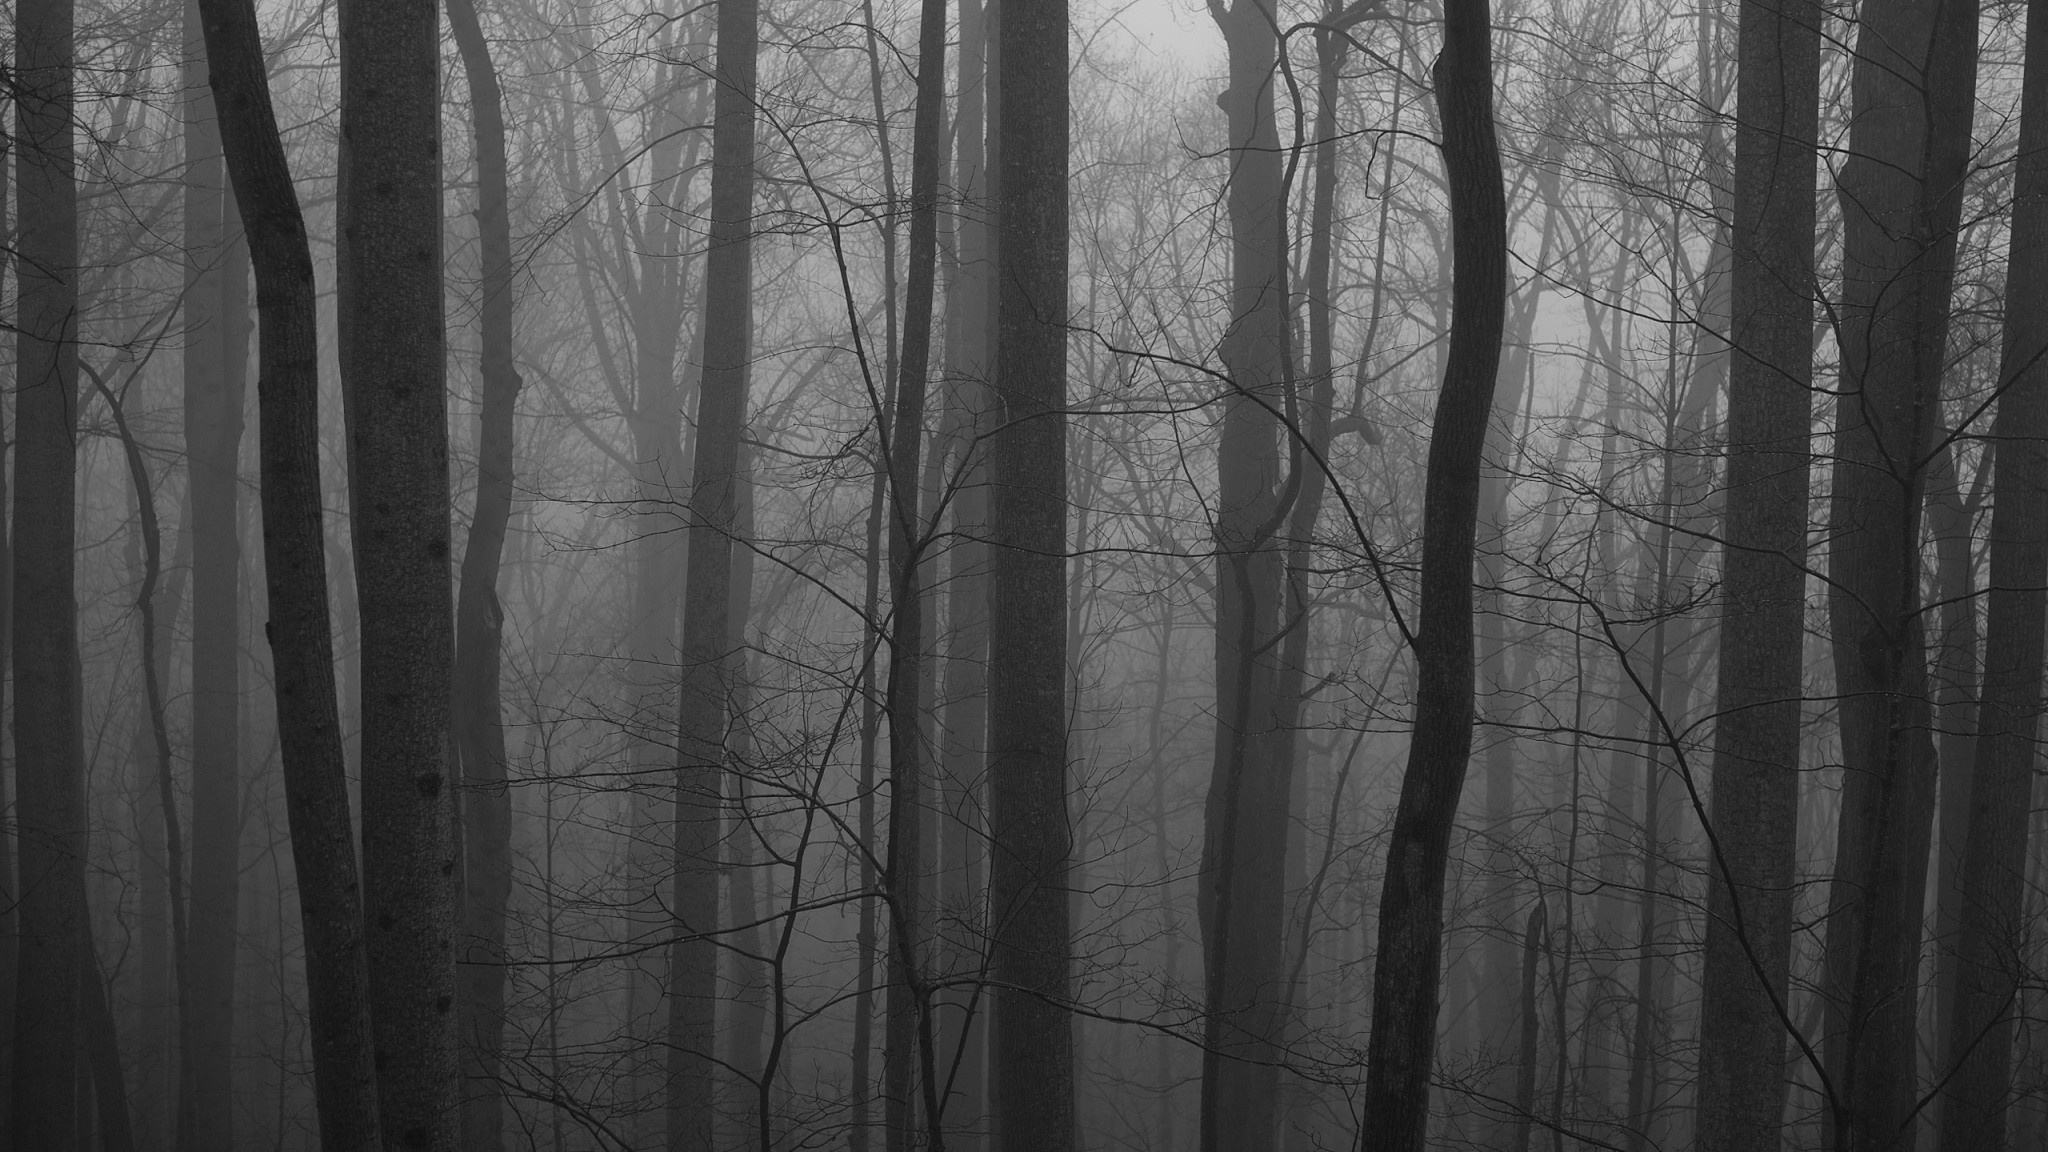

Gray level sliced


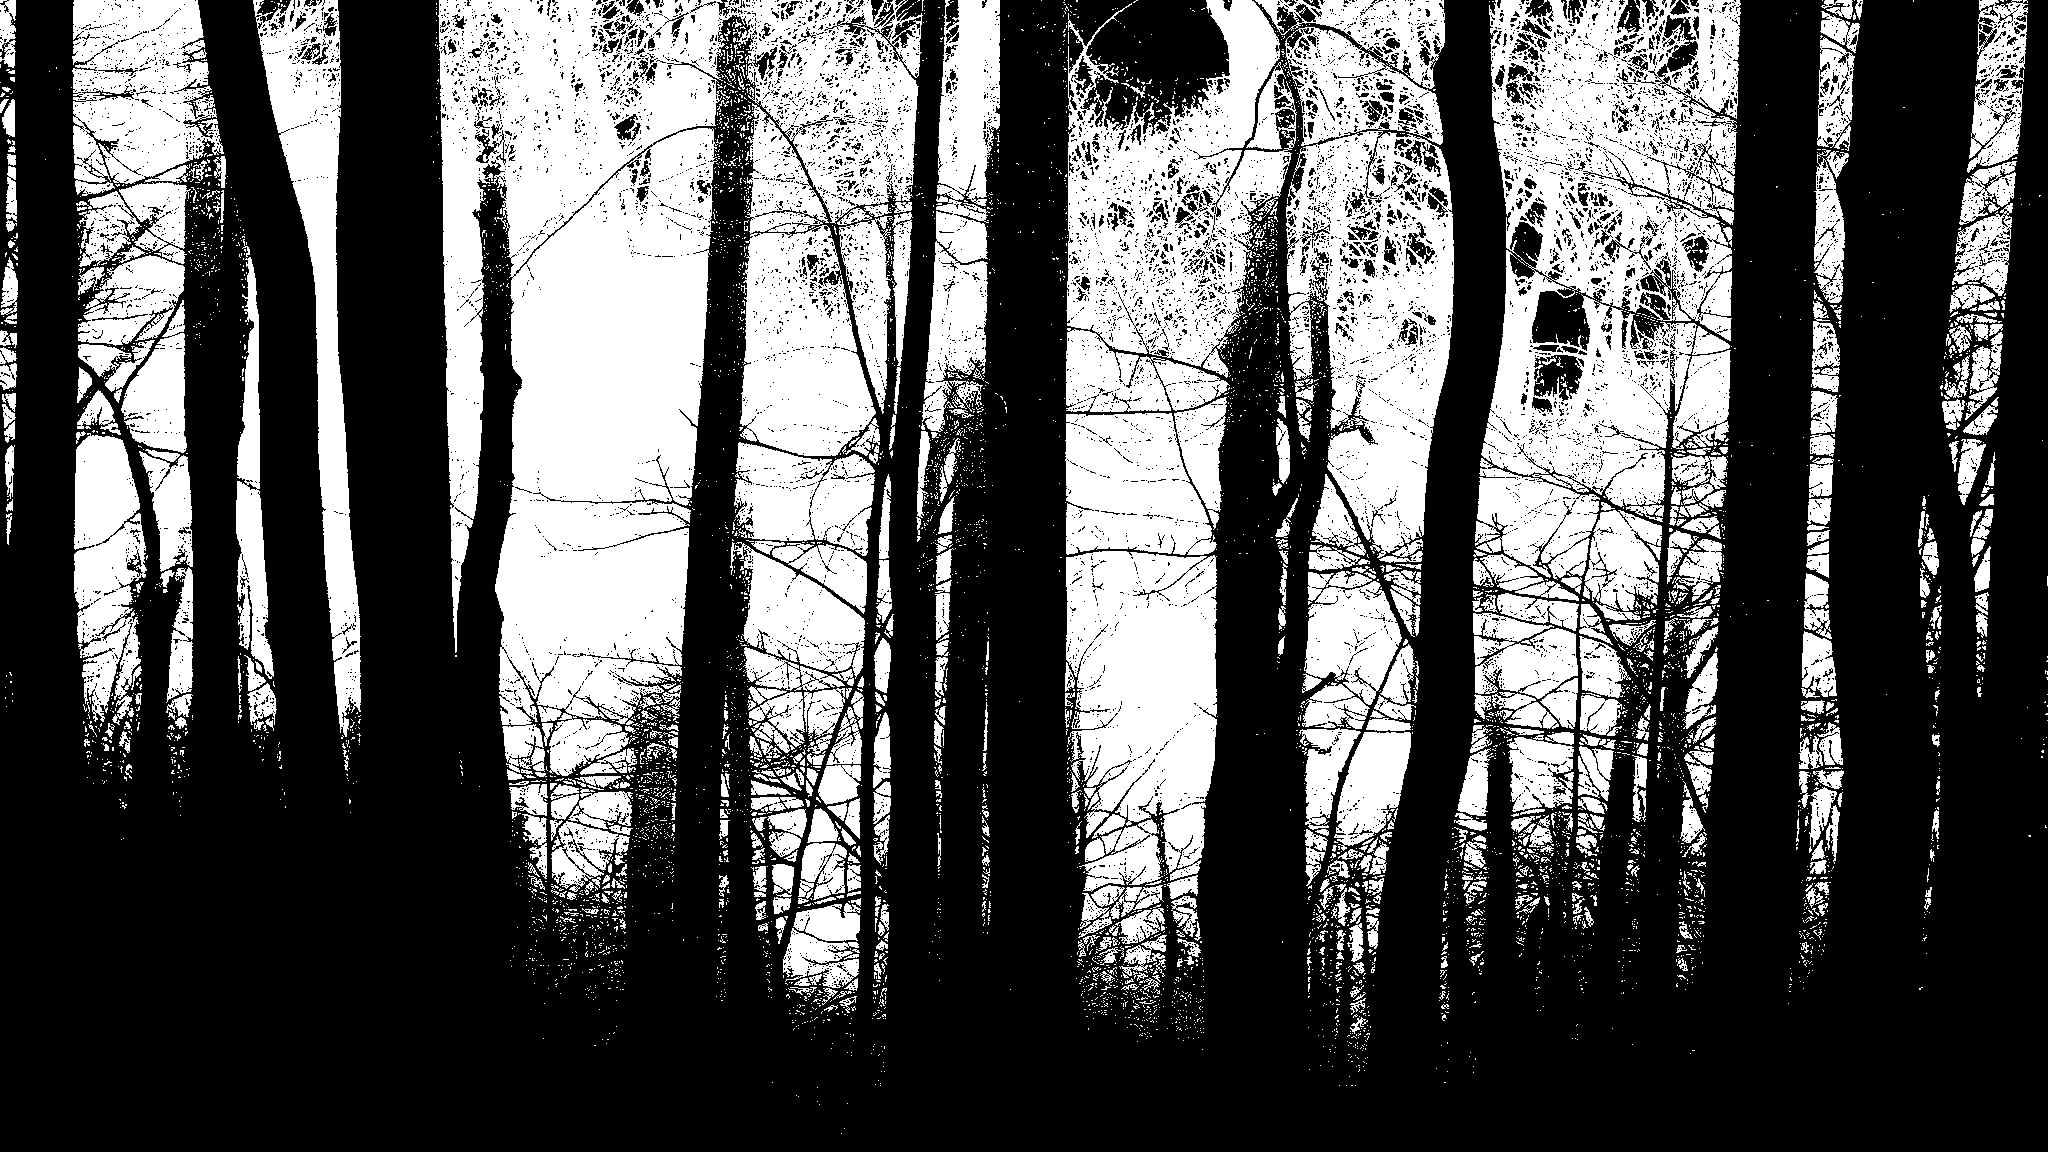

In [ ]:
# parameters
x1 = 80
x2 = 160
max = 255
min = 0

pixelVal_vec = np.vectorize(grayLevelSlicing)
img = cv2.imread(folder + 'trees.jpeg')
sliced = pixelVal_vec(img,x1,x2,max,min)

print("Original image")
cv2_imshow(img)
print("Gray level sliced")
cv2_imshow(sliced)


### e. Bit plane slicing

In [65]:
def BitPlaneSlicing(img, bit):
  li = []
  height,width = img.shape

  for row in range(height):
    for col in range(width):
      li.append(np.binary_repr(img[row][col], width=8))
  
  sliced = (np.array([int(i[8-bit]) for i in li], dtype = np.uint8) * (2**(bit-1))).reshape(height,width)

  return sliced

In [66]:
img = cv2.imread(folder + '/images/DIP Gonzalez/DIP3E_Original_Images_CH03/Fig0314(a)(100-dollars).tif',0)

img1 = BitPlaneSlicing(img,8)
img2 = BitPlaneSlicing(img,7)
img3 = BitPlaneSlicing(img,6)
img4 = BitPlaneSlicing(img,5)
img5 = BitPlaneSlicing(img,4)
img6 = BitPlaneSlicing(img,3)
img7 = BitPlaneSlicing(img,2)
img8 = BitPlaneSlicing(img,1)

images = [img1,img2,img3,img4,img5,img6,img7,img8]


original image


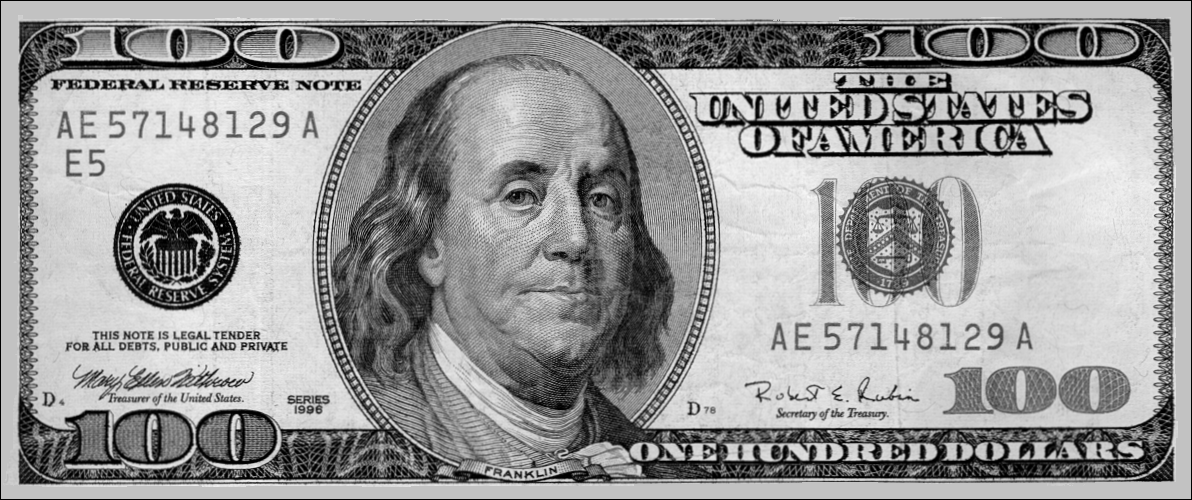

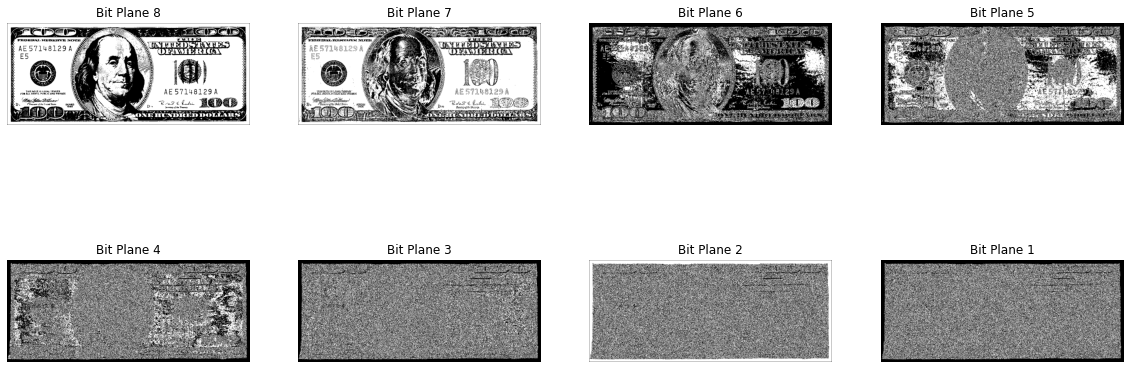

In [67]:
print("original image")
cv2_imshow(img)

fig, axis = plt.subplots(2,4,figsize=(20, 8))

i = 0 
n = 8
for rows in range(2):
  for cols in range(4):
    axis[rows,cols].imshow(images[i], cmap="gray")
    axis[rows,cols].set_title("Bit Plane " + str(n))
    axis[rows,cols].axis('off')
    i += 1
    n -= 1

## 2. Consider the graph for a typical transformation function used for Contrast Stretching in the given figure and determine the behavior of the function with respect to given changes.

### a. When r1 =s1 and r2=s2

(-0.5, 1191.5, 499.5, -0.5)

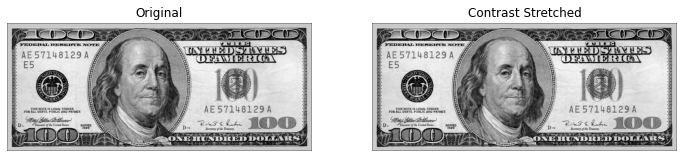

In [68]:
#parameters
r1 = 50
s1 = 50
r2 = 140
s2 = 140

pixelVal_vec = np.vectorize(constrastStretch)
img = cv2.imread(folder + '/images/DIP Gonzalez/DIP3E_Original_Images_CH03/Fig0314(a)(100-dollars).tif',0)
constrastStretched = pixelVal_vec(img, r1, s1, r2, s2)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axis[0].imshow(img, cmap ="gray")
axis[0].set_title("Original")
axis[0].axis('off')

axis[1].imshow(constrastStretched, cmap ="gray")
axis[1].set_title("Contrast Stretched")
axis[1].axis('off')


### We can see that there are no differences in two images.Reason for that is the slope of the graph is 1

### b. When r1=r2, s1=0 and s2=L-1

(-0.5, 1191.5, 499.5, -0.5)

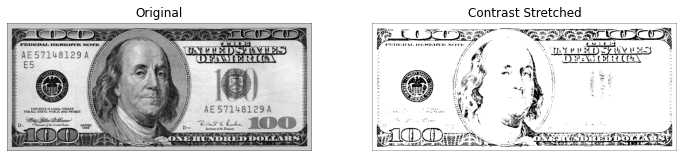

In [69]:
#parameters
r1 = 50
s1 = 0
r2 = 50
s2 = 255

pixelVal_vec = np.vectorize(constrastStretch)
img = cv2.imread(folder + '/images/DIP Gonzalez/DIP3E_Original_Images_CH03/Fig0314(a)(100-dollars).tif',0)
constrastStretched = pixelVal_vec(img, r1, s1, r2, s2)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axis[0].imshow(img, cmap ="gray")
axis[0].set_title("Original")
axis[0].axis('off')

axis[1].imshow(constrastStretched, cmap ="gray")
axis[1].set_title("Contrast Stretched")
axis[1].axis('off')


### We can see that in here the grayscale image has been converted to a binary image.The threshold value is r1

## 4. Masking

### Lab Task 04 :

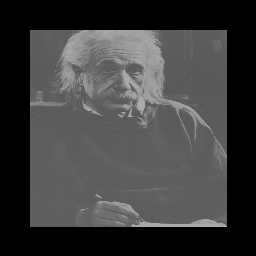

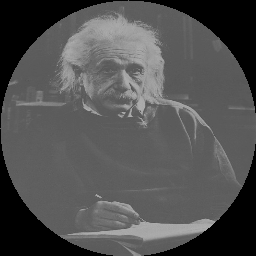

In [76]:
#Creating a rectangle mask
rectangle = np.zeros((256, 256), dtype="uint8")
cv2.rectangle(rectangle, (30, 30), (226, 226), 255, -1)

#Creating a circle mask
circle = np.zeros((256, 256), dtype="uint8")
cv2.circle(circle, (128, 128), 128, 255, -1)

img = cv2.imread(folder + 'Fig0354(a)(einstein_orig).tif',0)
img_resized = cv2.resize(img,(256,256))

#using bitwise and operation to combine image and mask
mask1 = cv2.bitwise_and(img_resized,rectangle)
mask2 = cv2.bitwise_and(img_resized,circle)

cv2_imshow(mask1)
print()
cv2_imshow(mask2)

## 5. Brightness

### Lab Task 05 : Write your own Python OpenCV function addbrightness() and use it to increase brightness of a given image.

In [97]:
def addbrightness(img,val):
  height,width = img.shape[:2]

  img1 = np.zeros(( height,width))

  for row in range(height):
    for col in range(width):
      if(img[row][col] + val > 255):
        img1[row][col] = 255
      else:
        img1[row][col] = img[row][col] + val
  
  return img1

(-0.5, 799.5, 449.5, -0.5)

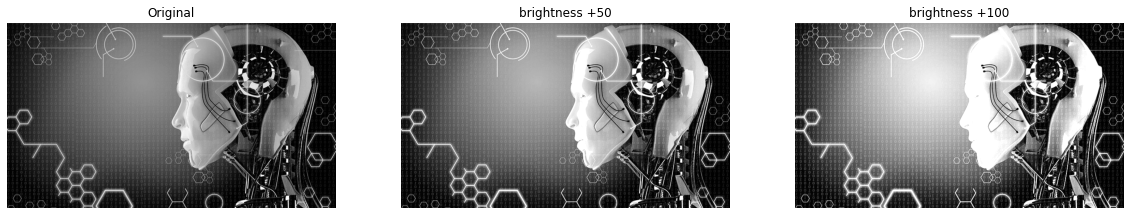

In [99]:
img = cv2.imread(folder + 'test_image.jpg',0)

img_1 = addbrightness(img,50)
img_2 = addbrightness(img,100)

fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

axis[0].imshow(img, cmap ="gray")
axis[0].set_title("Original")
axis[0].axis('off')

axis[1].imshow(img_1, cmap ="gray")
axis[1].set_title("brightness +50")
axis[1].axis('off')

axis[2].imshow(img_2, cmap ="gray")
axis[2].set_title("brightness +100")
axis[2].axis('off')

## 6. Histogram Processing

### Lab Task 06 :

### 1. Histogram Calculation in OpenCV 
### Use inbuilt OpenCV cv2.calcHist() function to display the histogram of a given image.

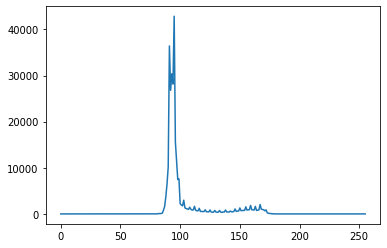

In [102]:
img = cv2.imread(folder + 'Fig0354(a)(einstein_orig).tif',0)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])

x = np.arange(256)

plt.plot(x,hist.ravel())


### 2. Histogram Calculation in Numpy 
### Use inbuilt numpy np.histogram() function to display the histogram of a given image.

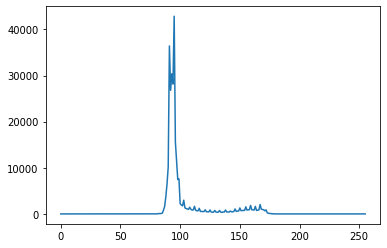

In [103]:
img = cv2.imread(folder + 'Fig0354(a)(einstein_orig).tif',0)

hist,bin = np.histogram(img.ravel(),256,[0,255])

x = np.arange(256)

plt.plot(x,hist.ravel())

### 3. Then write your own histogram functions for the following scenarios
### a. Show a histogram plot for a grayscale image.

In [104]:
def grayscale_hist(img):
  #to store number of occurences of intensity values (0-255)
  histogram = np.zeros(256)

  height,width = img.shape[:2]

  for row in range(height):
    for col in range(width):
      histogram[img[row][col]] += 1
  
  # plot the histogram
  x = np.arange(256)
  fig, axis = plt.subplots()
  
  axis.plot(x,histogram)
  plt.title('Histogram')
  plt.show()

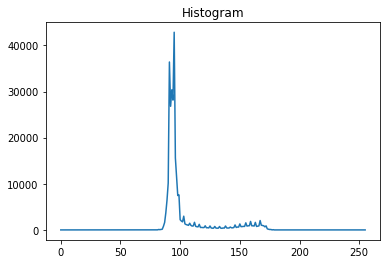

In [105]:
img = cv2.imread(folder + 'Fig0354(a)(einstein_orig).tif',0)

grayscale_hist(img)

### b. Show three histograms for a given RGB image.

In [122]:
def RGB_hist(img):
  #to store number of occurences of intensity values (0-255)
  red_histogram = np.zeros(256)
  green_histogram = np.zeros(256)
  blue_histogram = np.zeros(256)

  height,width = img.shape[:2]

  for row in range(height):
    for col in range(width):
      blue_histogram[img[row][col][0]] += 1
      green_histogram[img[row][col][1]] += 1
      red_histogram[img[row][col][2]] += 1
  
  # plot the histogram
  x = np.arange(256)
  fig, axis = plt.subplots(1,3,figsize=(20, 8))
  
  axis[0].plot(x,red_histogram,color='r')
  axis[0].set_title("Red Histogram'")

  axis[1].plot(x,green_histogram,color='g')
  axis[1].set_title("Green Histogram'")

  axis[2].plot(x,blue_histogram,color='b')
  axis[2].set_title("Blue Histogram'")


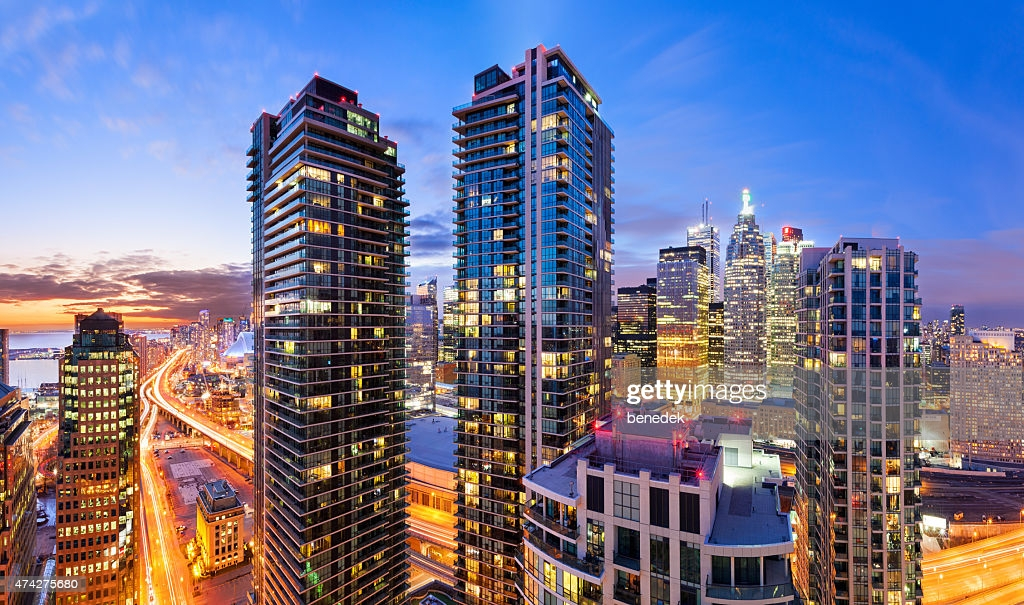

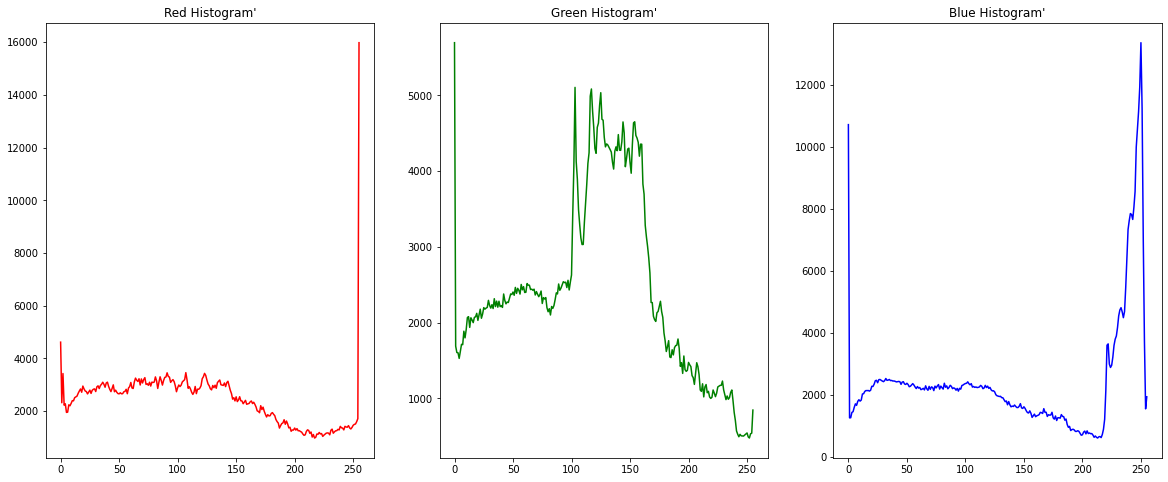

In [125]:
img = cv2.imread(folder + 'cities.jpg')
cv2_imshow(img)
RGB_hist(img)

### 4. Consider the four images given in the resources folder. Plot the histogram for each image. Perform Histogram Equalization on each image and plot the histograms of the resultant images. Comment on the results you have obtained.

In [138]:
def hist_equalization(img):
  img_hist_eq = cv2.equalizeHist(img)

  #histogram values for original image
  hist_org = cv2.calcHist([img], [0], None, [256], [0,256])
  
  #histogram values for equalized image
  hist_eq = cv2.calcHist([img_hist_eq], [0], None, [256], [0,256])


  #cv2_imshow(img_hist_eq )

  # plot the histogram
  x = np.arange(256)
  fig, axis = plt.subplots(1,2,figsize=(20, 8))
  
  axis[0].plot(x,hist_org,color='m')
  axis[0].set_title("Histogram of original image")

  axis[1].plot(x,hist_eq,color='c')
  axis[1].set_title("Histogram of equalized image")


bright.tif


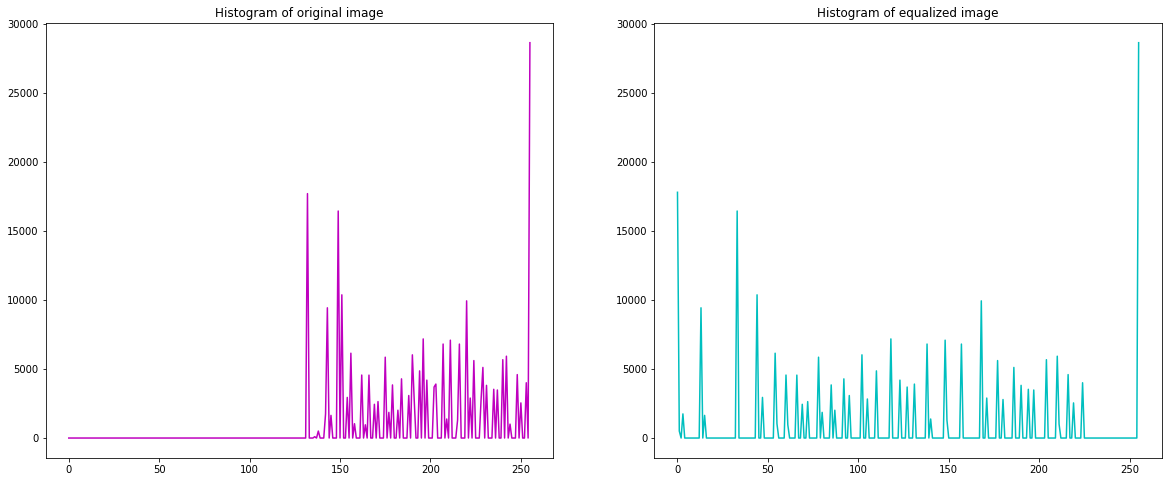

In [139]:
img = cv2.imread(folder + 'bright.tif',0)

print("bright.tif")
hist_equalization(img)

dark.tif


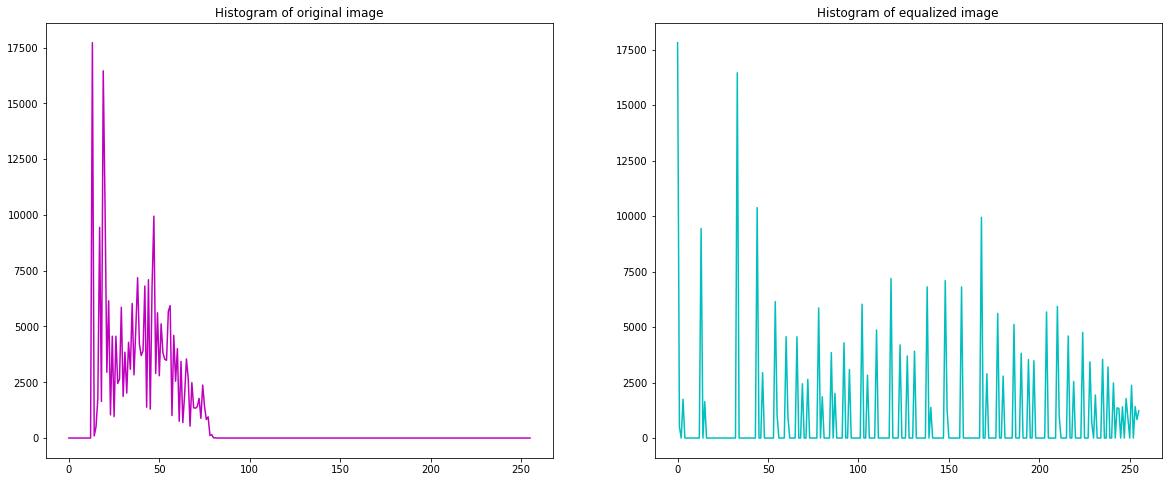

In [140]:
img = cv2.imread(folder + 'dark.tif',0)

print("dark.tif")
hist_equalization(img)

high_contrast.tif


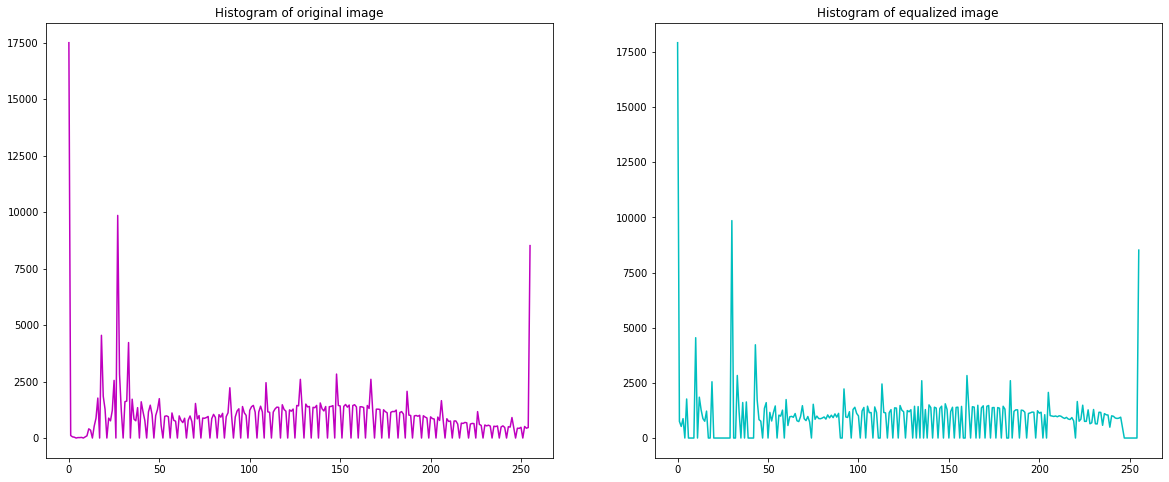

In [141]:
img = cv2.imread(folder + 'high_contrast.tif',0)

print("high_contrast.tif")
hist_equalization(img)

low_contrast.tif


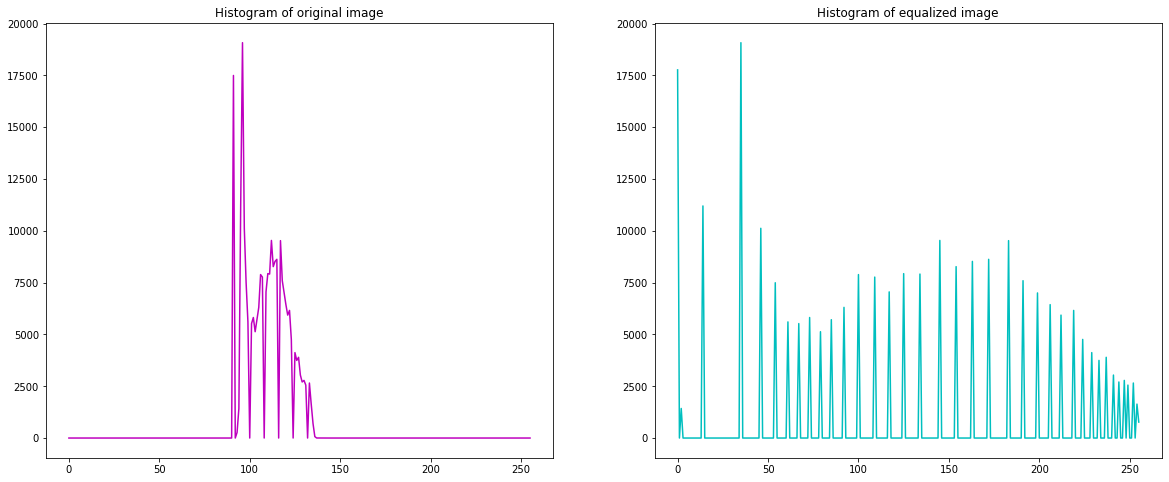

In [142]:
img = cv2.imread(folder + 'low_contrast.tif',0)

print("low_contrast.tif")
hist_equalization(img)

### We can clearly see that after performing Histogram Equalization histogram values are well spread out in the entire  range and images have become clearer.

In [145]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Lab02.ipynb',folder)